# Problem Sheet 3 - Diabetes dataset

### Statistical Machine Learning Course

In [1]:
# Standard libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# Train-test and preprocessing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Classifiers
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### Load the data

In [17]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
filename = 'pima-indians-diabetes.csv'
diabetes = pd.read_csv(filename, header = None)
diabetes.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Clean the data

In [18]:
# Missing values indicated by 0 - replace by nan
for name in diabetes.keys()[1:-1]: # for features other than pregnancies, 0 indicate a missing value, so replace by nan    
    diabetes[name] = diabetes[name].replace({0: np.nan})
diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [19]:
df = diabetes.drop(columns=['SkinThickness', 'Insulin']) # remove the dimensions with large number of missing data
df = df.dropna() # remove examples with missing data
# X and y data
X = df[df.keys()[0:-1]]
y = df[df.keys()[-1]]

(n,p) = X.shape
print('n =', n, ', p =', p)
df

n = 724 , p = 6


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


### Exploratory Analysis

<Figure size 432x288 with 0 Axes>

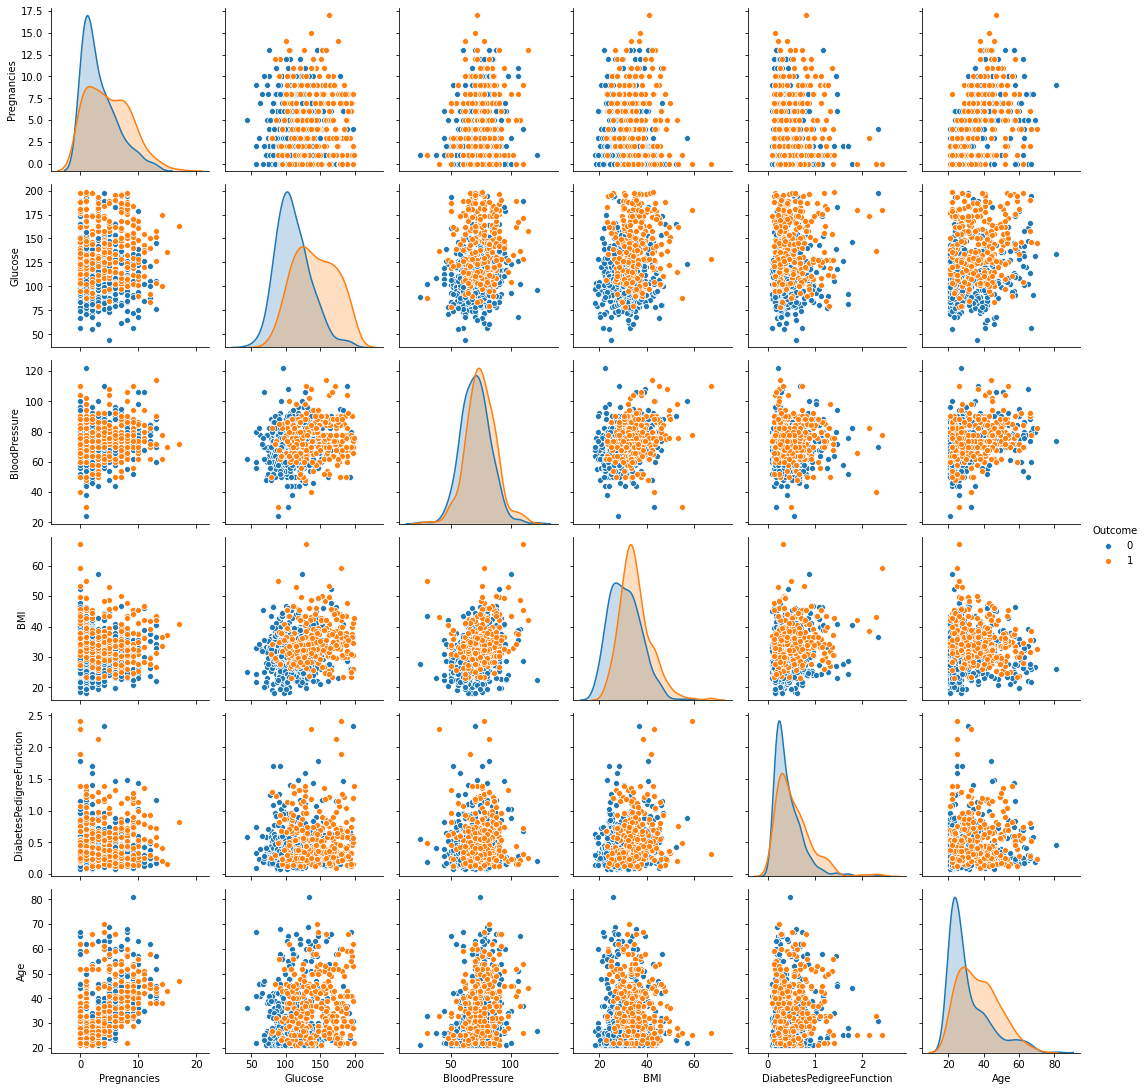

In [20]:
plt.figure()
sns.pairplot(data = df, hue='Outcome')

### Split training-test set

In [ ]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.25, random_state=12)

### Scale the data

In [22]:
scaler = StandardScaler().fit(X_train) # training data are centered with unit sample variances
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

### Comparison of LDA, QDA and Logistic Regression

-----------
Logistic Regression
-----------
Accuracy (training):  0.7826887661141805
Accuracy (test):  0.7624309392265194
Confusion Matrix (training): 
 [[320  39]
 [ 79 105]]
Confusion Matrix (test): 
 [[104  12]
 [ 31  34]]
AUC:  0.8164456233421751
-----------
LDA
-----------
Accuracy (training):  0.7771639042357275
Accuracy (test):  0.7679558011049724
Confusion Matrix (training): 
 [[320  39]
 [ 82 102]]
Confusion Matrix (test): 
 [[105  11]
 [ 31  34]]
AUC:  0.8152519893899205
-----------
QDA
-----------
Accuracy (training):  0.7845303867403315
Accuracy (test):  0.7016574585635359
Confusion Matrix (training): 
 [[309  50]
 [ 67 117]]
Confusion Matrix (test): 
 [[93 23]
 [31 34]]
AUC:  0.759814323607427
-----------
NaiveBayes
-----------
Accuracy (training):  0.7697974217311234
Accuracy (test):  0.7292817679558011
Confusion Matrix (training): 
 [[304  55]
 [ 70 114]]
Confusion Matrix (test): 
 [[94 22]
 [27 38]]
AUC:  0.7925729442970821


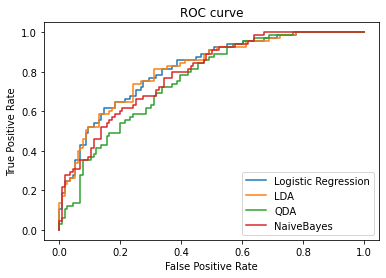

In [24]:
from sklearn.naive_bayes import GaussianNB

# Main function that computes various metrics for a given classifier clf
def clf_fun(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)

    yhat_train = clf.predict(X_train)
    yhat_test = clf.predict(X_test)
    accuracy_train = clf.score(X_train, y_train)
    accuracy_test = clf.score(X_test, y_test)
    fhat_test = clf.predict_log_proba(X_test)[:,1]
    #fhat_test = clf.decision_function(X_test) # value of the discriminant function on the test inputs
    fpr_test, tpr_test, thr = roc_curve(y_test, fhat_test) # fpr and tpr on test data
    auc_test = auc(fpr_test, tpr_test) # AUC score
    
    conf_train = confusion_matrix(y_train, yhat_train)
    conf_test = confusion_matrix(y_test, yhat_test)    
    return accuracy_train, accuracy_test, conf_train, conf_test,  fpr_test, tpr_test, auc_test


classifiers = [LogisticRegression(penalty='none'), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(), GaussianNB()]
names = ['Logistic Regression', 'LDA', 'QDA', 'NaiveBayes']
plt.figure()
for (i, clf) in enumerate(classifiers): # for each classifier
    accuracy_train, accuracy_test, conf_train, conf_test,  fpr_test, tpr_test, auc_test = clf_fun(clf, X_train_sc, y_train, X_test_sc, y_test)
    plt.plot(fpr_test, tpr_test)
    print('-----------')
    print(names[i])
    print('-----------')
    print('Accuracy (training): ', accuracy_train)
    print('Accuracy (test): ', accuracy_test)       
    print('Confusion Matrix (training): \n', conf_train)
    print('Confusion Matrix (test): \n', conf_test)
    print('AUC: ', auc_test)

  
plt.legend(names)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve');

### With interactions

In [27]:
# Adding interaction terms does not seem to help much on this dataset, even with the help of regularisation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias = False, interaction_only=True)
# Polynomial expansion
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# Standardisation
scaler = StandardScaler().fit(X_train_poly) # training data are centered with unit sample variances
X_train_poly_sc = scaler.transform(X_train_poly)
X_test_poly_sc = scaler.transform(X_test_poly)
X_train_poly.shape

(543, 21)

-----------
Logistic Regression
-----------
Accuracy (training):  0.7900552486187845
Accuracy (test):  0.7458563535911602
AUC:  0.8017241379310345
Confusion Matrix (training): 
 [[317  42]
 [ 72 112]]
Confusion Matrix (test): 
 [[102  14]
 [ 32  33]]
-----------
LDA
-----------
Accuracy (training):  0.7863720073664825
Accuracy (test):  0.7458563535911602
AUC:  0.7904509283819628
Confusion Matrix (training): 
 [[316  43]
 [ 73 111]]
Confusion Matrix (test): 
 [[102  14]
 [ 32  33]]
-----------
QDA
-----------
Accuracy (training):  0.7974217311233885
Accuracy (test):  0.7292817679558011
AUC:  0.7749336870026525
Confusion Matrix (training): 
 [[320  39]
 [ 71 113]]
Confusion Matrix (test): 
 [[102  14]
 [ 35  30]]
-----------
NaiveBayes
-----------
Accuracy (training):  0.7642725598526704
Accuracy (test):  0.712707182320442
AUC:  0.7778514588859416
Confusion Matrix (training): 
 [[293  66]
 [ 62 122]]
Confusion Matrix (test): 
 [[92 24]
 [28 37]]


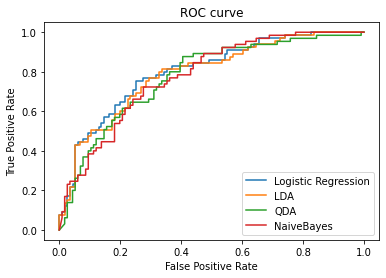

In [28]:
classifiers = [LogisticRegression(C=1), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(), GaussianNB()]
plt.figure()
for (i, clf) in enumerate(classifiers): # for each classifier
    accuracy_train, accuracy_test, conf_train, conf_test,  fpr_test, tpr_test, auc_test = clf_fun(clf, X_train_poly_sc, y_train, X_test_poly_sc, y_test)
    plt.plot(fpr_test, tpr_test)
    print('-----------')
    print(names[i])
    print('-----------')
    print('Accuracy (training): ', accuracy_train)
    print('Accuracy (test): ', accuracy_test)    
    print('AUC: ', auc_test)
    print('Confusion Matrix (training): \n', conf_train)
    print('Confusion Matrix (test): \n', conf_test)
   
plt.legend(names)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve');